In [ ]:
#Öncelikel Colab'ı drive'a bağlayalım

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [ ]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
#Veriyi Colab'a yüklüyoruz.

In [ ]:
!kaggle datasets download -d sujithmandala/pokmon-combat-power-prediction

Dataset URL: https://www.kaggle.com/datasets/sujithmandala/pokmon-combat-power-prediction
License(s): CC-BY-SA-4.0
pokmon-combat-power-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#Veriyi zipten çıkartıyoruz.

In [ ]:
!unzip \*.zip && rm *.zip

Archive:  pokmon-combat-power-prediction.zip
replace pokemon.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
#Kütüphaneleri import ediyoruz.

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Veriyi okuması için bir değişkene atıyoruz.

In [ ]:
pokemon=pd.read_csv("pokemon.csv")

In [ ]:
#Veriyi okutuyoruz.

In [ ]:
pokemon

,Name,Type 1,Type 2,Combat Power,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
146,Dratini,Dragon,NaN,300,41,64,45,50,50,50,1,False
147,Dragonair,Dragon,NaN,420,61,84,65,70,70,70,1,False
148,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,1,False
149,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True


In [ ]:
#Kodumuzda kaç tane satır ve sütun olduğunu kontrol ediyoruz.

In [ ]:
pokemon.shape

(151, 12)

In [ ]:
#Verimizin sütunlarını öğrenelim

In [ ]:
pokemon.columns

Index(['Name', 'Type 1', 'Type 2', 'Combat Power', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [ ]:
# Kolonlarda boşluk ifadesi olanları yerine alt çizgi (_) koyuyoruz.

In [ ]:
pokemon.columns = pokemon.columns.str.replace(' ', '_')

In [ ]:
pokemon.columns

Index(['Name', 'Type_1', 'Type_2', 'Combat_Power', 'HP', 'Attack', 'Defense',
       'Sp._Atk', 'Sp._Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [55]:
pokemon.isnull().sum()

Name             0
Type_1           0
Type_2          84
Combat_Power     0
HP               0
Attack           0
Defense          0
Sp._Atk          0
Sp._Def          0
Speed            0
Generation       0
Legendary        0
dtype: int64

In [57]:
pokemon.fillna("Unclear", inplace=True)

In [58]:
pokemon.isnull().sum()

Name            0
Type_1          0
Type_2          0
Combat_Power    0
HP              0
Attack          0
Defense         0
Sp._Atk         0
Sp._Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [ ]:
#Tüm pokemon karakterlerinin özel atak gücü medyanına bakalım

In [ ]:
spatkpower_median = pokemon["Sp._Atk"].median()
spatkpower_median

65.0

In [ ]:
#Tüm pokemon karakterlerinin özel savunma gücü medyanına bakalım

In [ ]:
spdefpower_median = pokemon["Sp._Def"].median()
spdefpower_median

65.0

In [ ]:
#Ayrıca tüm pokemonların normal savunma ve atak gücü medyanına bakalım

In [ ]:
defpower_median = pokemon["Defense"].median()
defpower_median

65.0

In [ ]:
atkpower_median = pokemon["Attack"].median()
atkpower_median

70.0

In [ ]:
hp_median = pokemon["HP"].median()
hp_median

60.0

In [ ]:
#Aşırı değerlerin kontrolünü yapalım

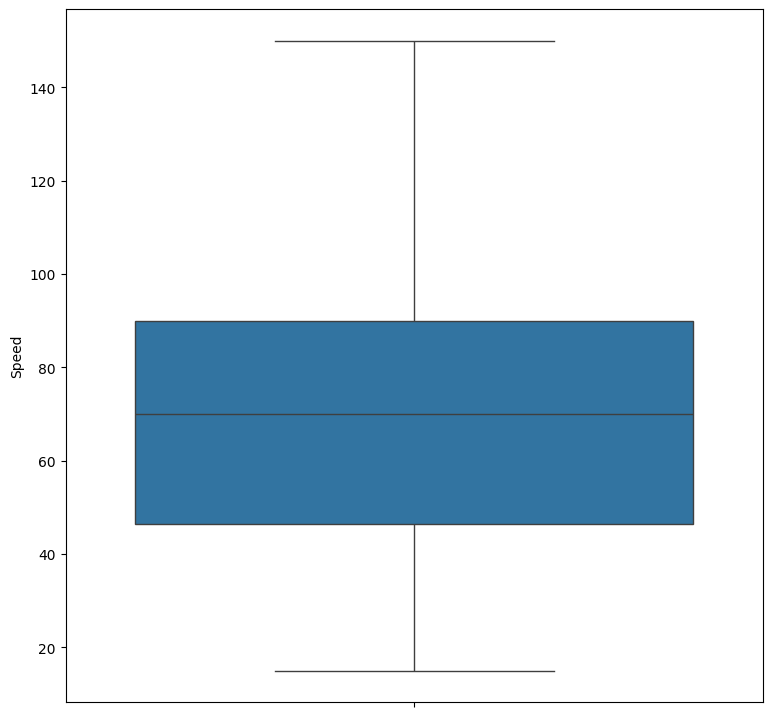

In [ ]:
sns.boxplot(data=pokemon["Speed"])
plt.show()

In [ ]:
#Görüldüğü üzere Speed sütununda aşırı bir değer yok.

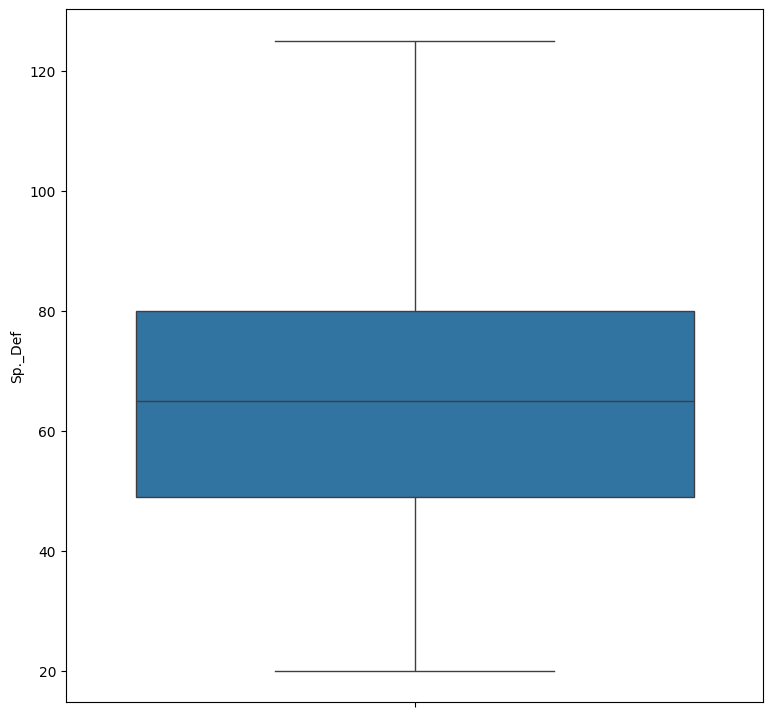

In [ ]:
sns.boxplot(data=pokemon["Sp._Def"])
plt.show()

In [ ]:
#Görüldüğü üzere Sp._Def sütununda aşırı değer yok

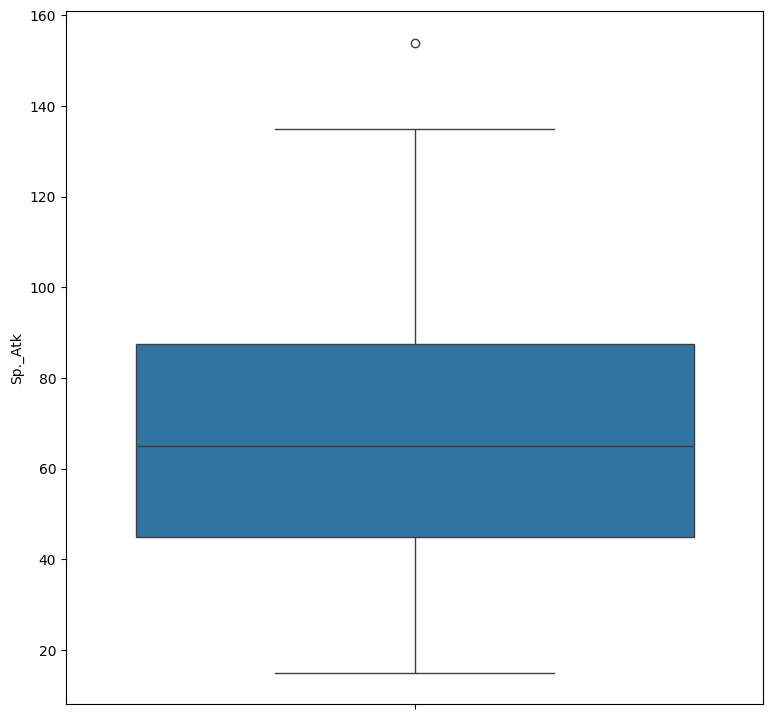

In [ ]:
sns.boxplot(data=pokemon["Sp._Atk"])
plt.show()

In [ ]:
#Görüldüğü üzere Sp._Atk sütununda bir aşırı değer vardır.

In [ ]:
Q1 = pokemon["Sp._Atk"].quantile(0.25)
Q3 = pokemon["Sp._Atk"].quantile(0.75)
IQR = Q3 - Q1
altsinir = Q1 - 1.5 * IQR
ustsinir = Q3 + 1.5 * IQR
askucuk = pokemon[pokemon["Sp._Atk"]<altsinir]["Sp._Atk"]
usbuyuk = pokemon[pokemon["Sp._Atk"]>ustsinir]["Sp._Atk"]
aykiri = pd.concat([askucuk,usbuyuk],axis=0).index
indeksler = []
for i in aykiri:
  indeksler.append(i)
yenipokemon=pokemon.drop(pokemon.index[indeksler])
print(pokemon.shape)
print(yenipokemon.shape)

(151, 12)
(150, 12)


In [ ]:
#Aşırı değeri kurallarına göre önce
#Q1 ve Q3 daha sonra ise IQR değerlerini belirledik.
#Ondan sonra altsinir ve ustsinirleri belirledik.
# min ve max alabileceği değerleri atadık ve bunları aykırının içinde indeksleriyle bizi döndürmesi için aykiri'ya atadık.
# daha sonra direkt indeksini kullanabilmemiz icin for döngüsü içinde yeni bir indeksler listesine yerleştirdik
# daha sonra ise yeni datayı maksimum değerlerinden arınmış şekild elde ettik.
# görüldüğü üzere 151 olan data serisi 150'ye düştü. Bu da demek oluyor ki elimizde sadece 1 tane aşırı değer vardı. Bunu daha önceki haritadan da görebiliriz.


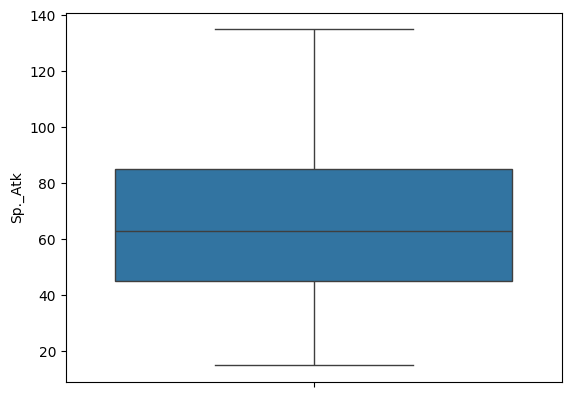

In [ ]:
sns.boxplot(data=yenipokemon["Sp._Atk"])
plt.show()

In [ ]:
#Harita da görüldüğü üzere değer ortadan kalktı.

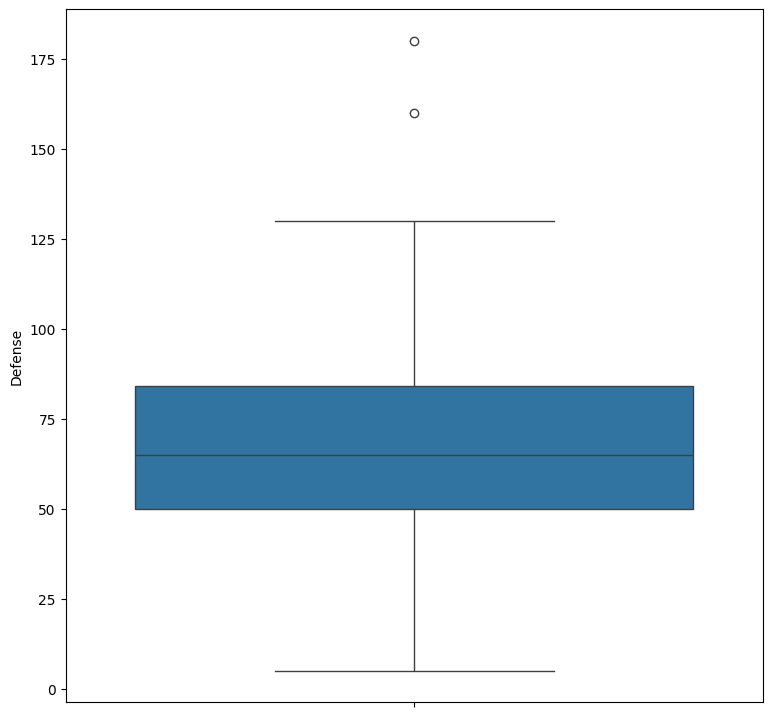

In [ ]:
sns.boxplot(data=pokemon["Defense"])
plt.show()

In [ ]:
#Görüldüğü üzere Defense sütununda aşırı değerler vardır.

In [ ]:
Q1 = pokemon["Defense"].quantile(0.25)
Q3 = pokemon["Defense"].quantile(0.75)
IQR = Q3 - Q1
altsinir = Q1 - 1.5 * IQR
ustsinir = Q3 + 1.5 * IQR
askucuk = pokemon[pokemon["Defense"]<altsinir]["Defense"]
usbuyuk = pokemon[pokemon["Defense"]>ustsinir]["Defense"]
aykiri = pd.concat([askucuk,usbuyuk],axis=0).index
indeksler = []
for i in aykiri:
  indeksler.append(i)
yeni1pokemon=yenipokemon.drop(yenipokemon.index[indeksler])
print(pokemon.shape)
print(yenipokemon.shape)
print(yeni1pokemon.shape)

(151, 12)
(150, 12)
(148, 12)


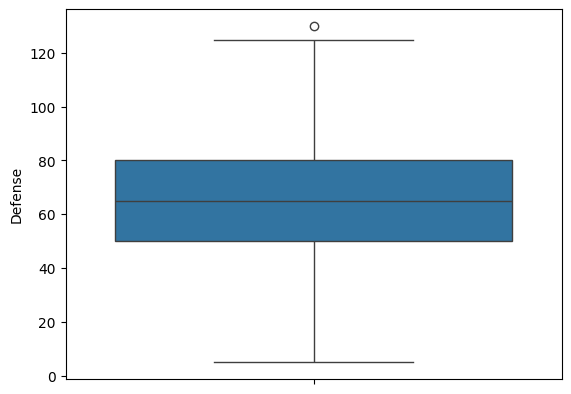

In [ ]:
sns.boxplot(data=yeni1pokemon["Defense"])
plt.show()

In [ ]:
#Burdaki de aşırı değerler silindi 1 tane kaldı ama o da çok aykırı bir değer olmadığı için silinmedi.

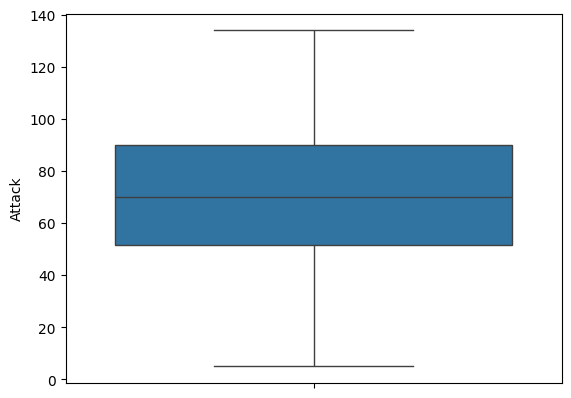

In [ ]:
sns.boxplot(data=yeni1pokemon["Attack"])
plt.show()

In [ ]:
#Görüldüğü üzere Attack sütununda aşırı değer yok

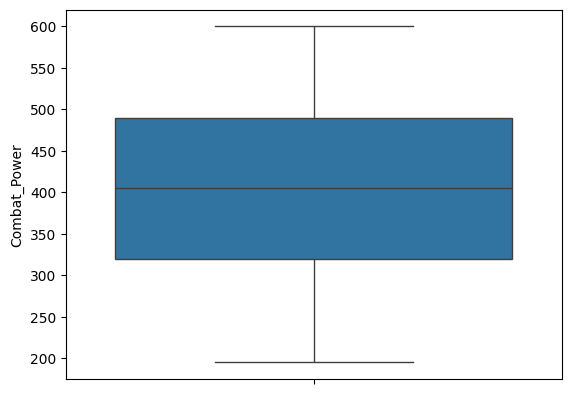

In [54]:
sns.boxplot(data=yeni2pokemon["Combat_Power"])
plt.show()

In [ ]:
#Görüldüğü üzere Combat_Power sütununda aşırı değer yok

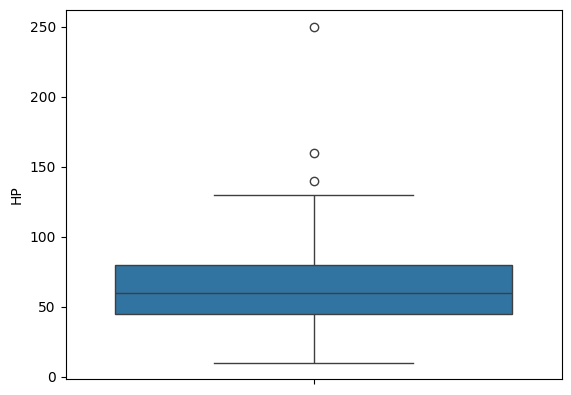

In [ ]:
sns.boxplot(data=yeni1pokemon["HP"])
plt.show()

In [ ]:
#Görüldüğü üzere HP sütununda aşırı değerler vardır.

In [ ]:
Q1 = pokemon["HP"].quantile(0.25)
Q3 = pokemon["HP"].quantile(0.75)
IQR = Q3 - Q1
altsinir = Q1 - 1.5 * IQR
ustsinir = Q3 + 1.5 * IQR
askucuk = pokemon[pokemon["HP"]<altsinir]["HP"]
usbuyuk = pokemon[pokemon["HP"]>ustsinir]["HP"]
aykiri = pd.concat([askucuk,usbuyuk],axis=0).index
indeksler = []
for i in aykiri:
  indeksler.append(i)
yeni2pokemon=yeni1pokemon.drop(yeni1pokemon.index[indeksler])
print(pokemon.shape)
print(yenipokemon.shape)
print(yeni1pokemon.shape)
print(yeni2pokemon.shape)

(151, 12)
(150, 12)
(148, 12)
(145, 12)


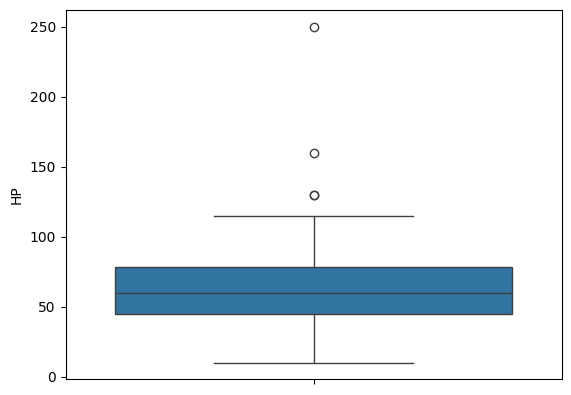

In [191]:
sns.boxplot(data=yeni2pokemon["HP"])
plt.show()

In [ ]:
#Silsek bile hala duruyorlar. Nasıl yapabileceğimi çözemedim.

In [ ]:
#Yeni veri setindeki boşlukları dolduralım

In [59]:
yeni2pokemon.isnull().sum()

Name             0
Type_1           0
Type_2          82
Combat_Power     0
HP               0
Attack           0
Defense          0
Sp._Atk          0
Sp._Def          0
Speed            0
Generation       0
Legendary        0
dtype: int64

In [60]:
yeni2pokemon['Type_2'].fillna("Unclear", inplace=True)

In [61]:
yeni2pokemon.isnull().sum()

Name            0
Type_1          0
Type_2          0
Combat_Power    0
HP              0
Attack          0
Defense         0
Sp._Atk         0
Sp._Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [ ]:
#Verideki pokemon karakterlerinin efsaneviliğine göre özel saldırı gücüne bakalım

In [ ]:
#Tüm ortalamaları hesaplayalım

In [80]:
yeni2pokemon["HP"].mean()

63.241379310344826

In [78]:
yeni2pokemon["Speed"].mean()

68.37241379310345

In [79]:
yeni2pokemon["Sp._Def"].mean()

65.99310344827586

In [82]:
yeni2pokemon["Sp._Atk"].mean()

66.33793103448276

In [75]:
yeni2pokemon["Combat_Power"].mean()

402.5793103448276

In [76]:
yeni2pokemon["Attack"].mean()

72.06896551724138

In [81]:
yeni2pokemon["Defense"].mean()

66.63448275862069

In [ ]:
#Tüm standart sapmaları hesaplayalım

In [66]:
yeni2pokemon["HP"].std()

27.83864117604765

In [84]:
yeni2pokemon["Combat_Power"].std()

97.28799378973844

In [83]:
yeni2pokemon["Speed"].std()

26.754009260188514

In [85]:
yeni2pokemon["Sp._Def"].std()

24.344887825134677

In [86]:
yeni2pokemon["Sp._Atk"].std()

27.43558635180653

In [87]:
yeni2pokemon["Defense"].std()

24.43239362480778

In [88]:
yeni2pokemon["Attack"].std()

26.69130506894567

In [ ]:
#Sütunların genel olarak dağılımlarını inceyelim

In [129]:
yeni2pokemon.columns

Index(['Name', 'Type_1', 'Type_2', 'Combat_Power', 'HP', 'Attack', 'Defense',
       'Sp._Atk', 'Sp._Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

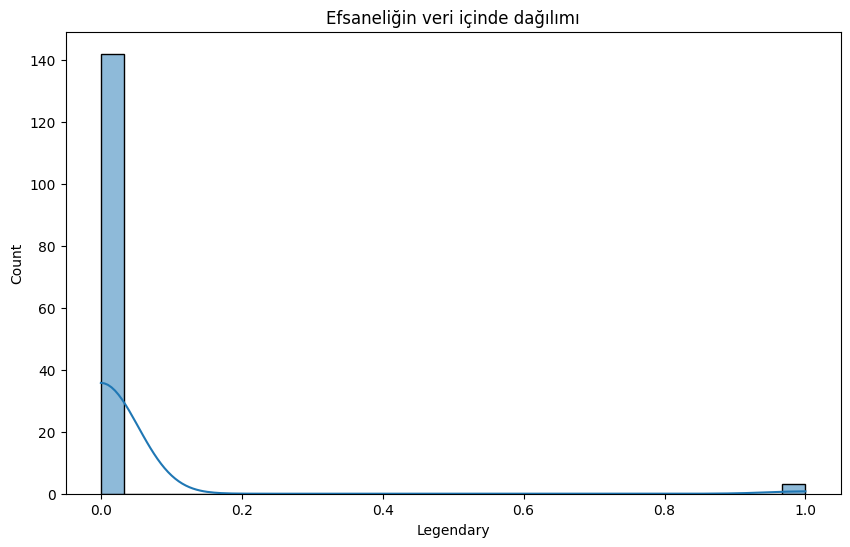

In [138]:
plt.figure(figsize=(10,6))
sns.histplot(yeni2pokemon["Legendary"],kde=True,bins=30)
plt.title("Efsaneliğin veri içinde dağılımı")
plt.show()

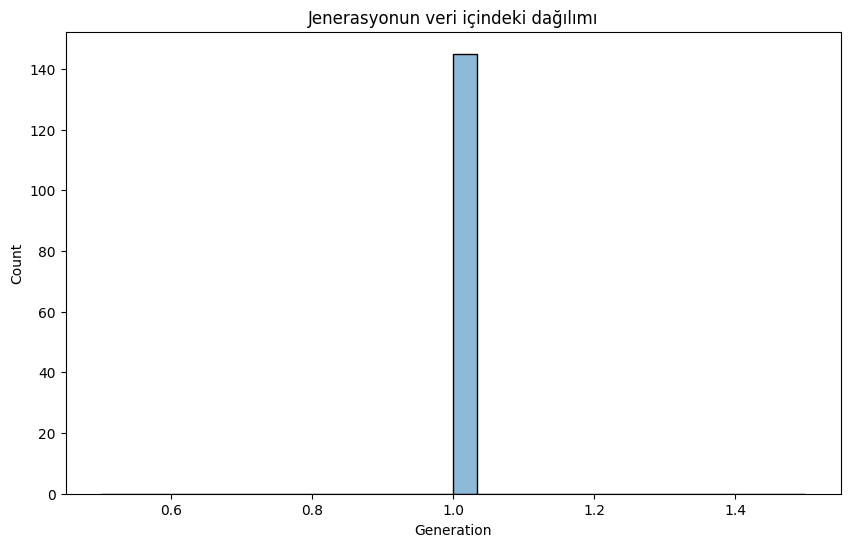

In [139]:
plt.figure(figsize=(10,6))
sns.histplot(yeni2pokemon["Generation"],kde=True,bins=30)
plt.title("Jenerasyonun veri içindeki dağılımı")
plt.show()

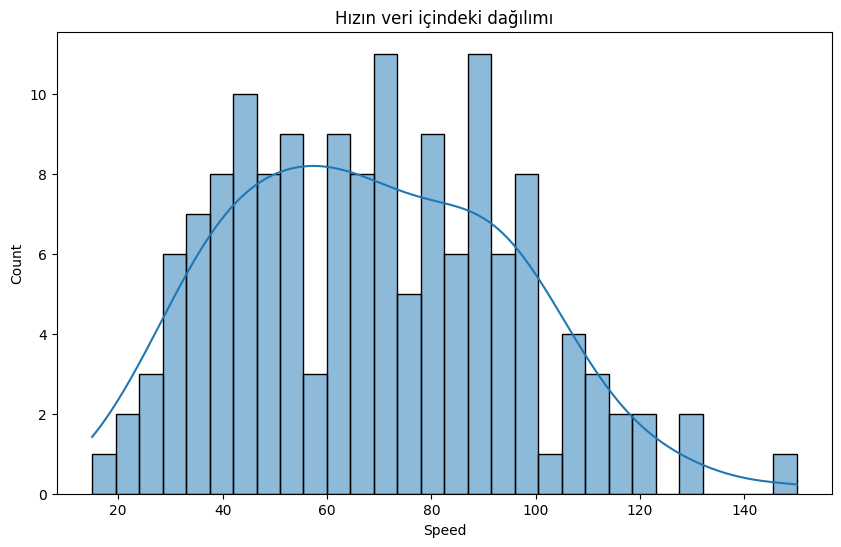

In [140]:
plt.figure(figsize=(10,6))
sns.histplot(yeni2pokemon["Speed"],kde=True,bins=30)
plt.title("Hızın veri içindeki dağılımı")
plt.show()

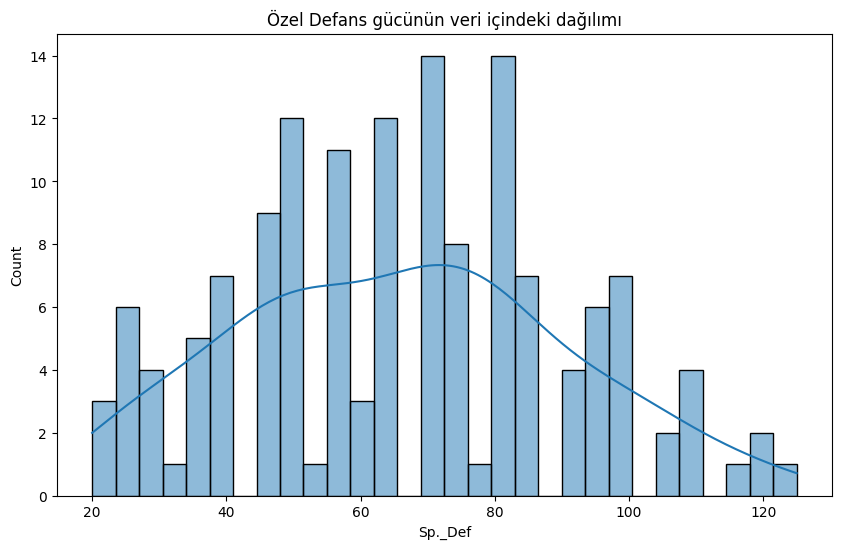

In [141]:
plt.figure(figsize=(10,6))
sns.histplot(yeni2pokemon["Sp._Def"],kde=True,bins=30)
plt.title("Özel Defans gücünün veri içindeki dağılımı")
plt.show()

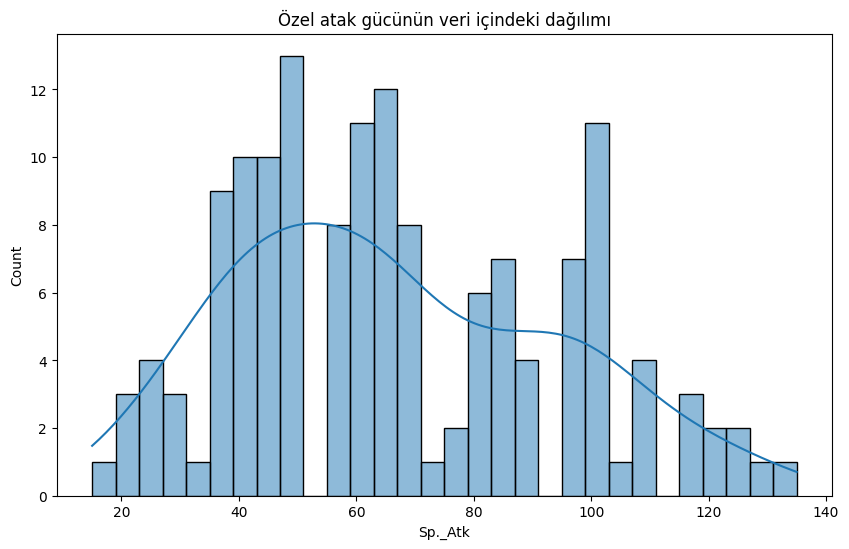

In [142]:
plt.figure(figsize=(10,6))
sns.histplot(yeni2pokemon["Sp._Atk"],kde=True,bins=30)
plt.title("Özel atak gücünün veri içindeki dağılımı")
plt.show()

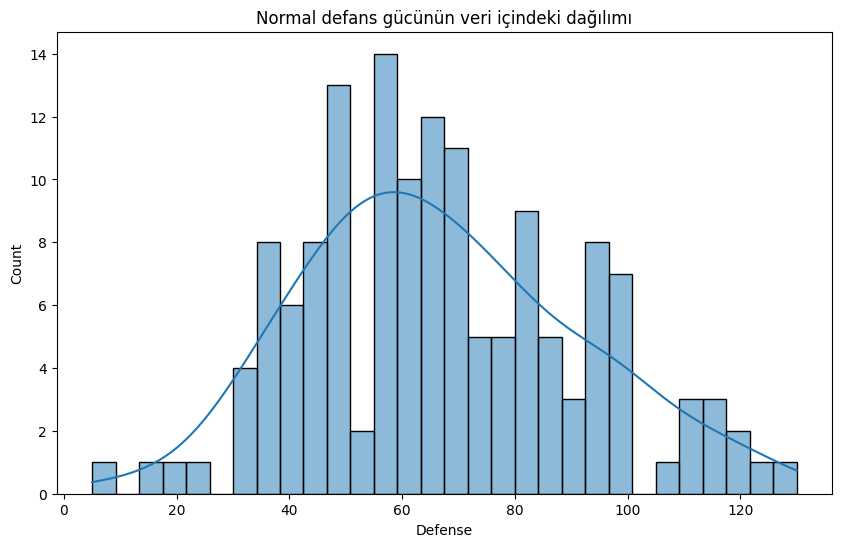

In [144]:
plt.figure(figsize=(10,6))
sns.histplot(yeni2pokemon["Defense"],kde=True,bins=30)
plt.title("Normal defans gücünün veri içindeki dağılımı")
plt.show()

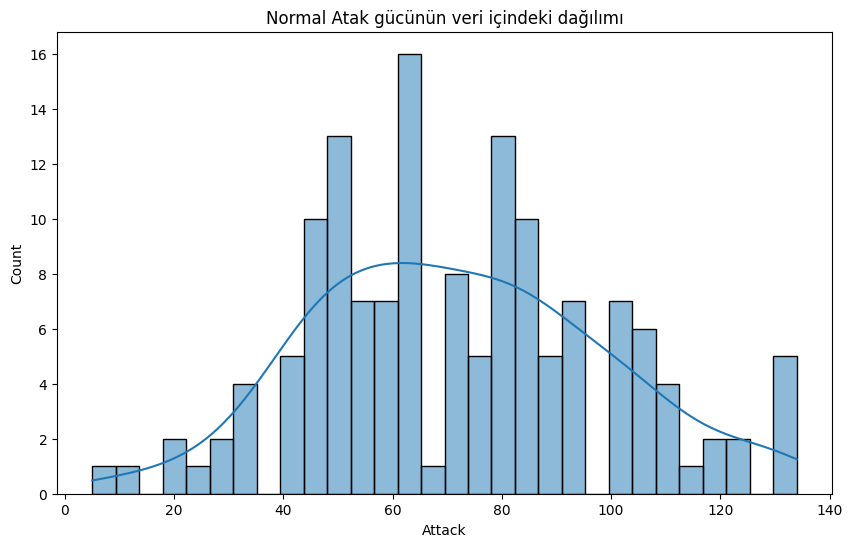

In [145]:
plt.figure(figsize=(10,6))
sns.histplot(yeni2pokemon["Attack"],kde=True,bins=30)
plt.title("Normal Atak gücünün veri içindeki dağılımı")
plt.show()

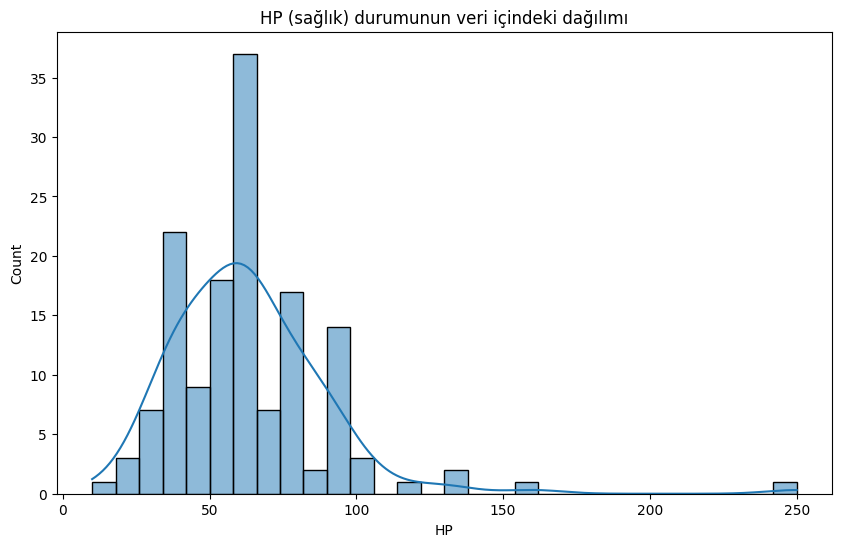

In [146]:
plt.figure(figsize=(10,6))
sns.histplot(yeni2pokemon["HP"],kde=True,bins=30)
plt.title("HP (sağlık) durumunun veri içindeki dağılımı")
plt.show()

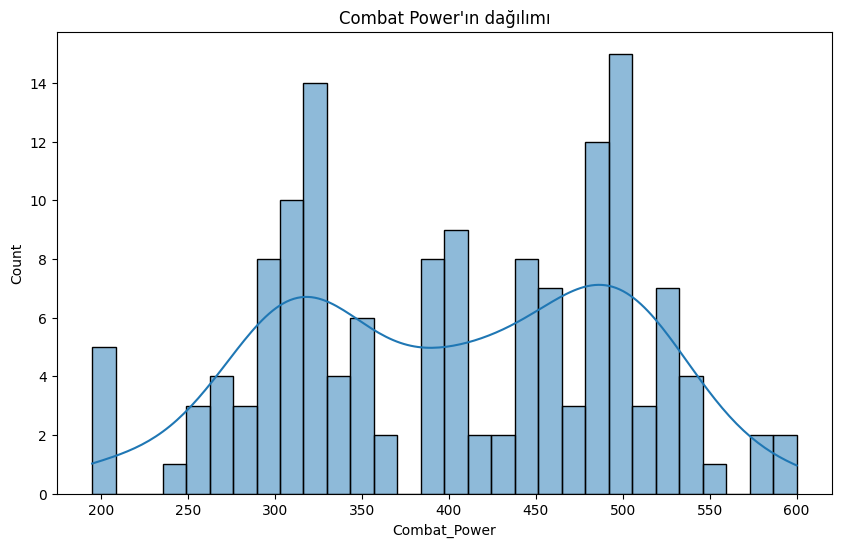

In [128]:
plt.figure(figsize=(10,6))
sns.histplot(yeni2pokemon["Combat_Power"],kde=True,bins=30)
plt.title("Combat Power'ın dağılımı")
plt.show()

In [ ]:
#Dağılım grafiğinde sütunlar arası ilişkilere bakalım

In [ ]:
#Atak ve defans gücündeki Efsanelik ilişkisi

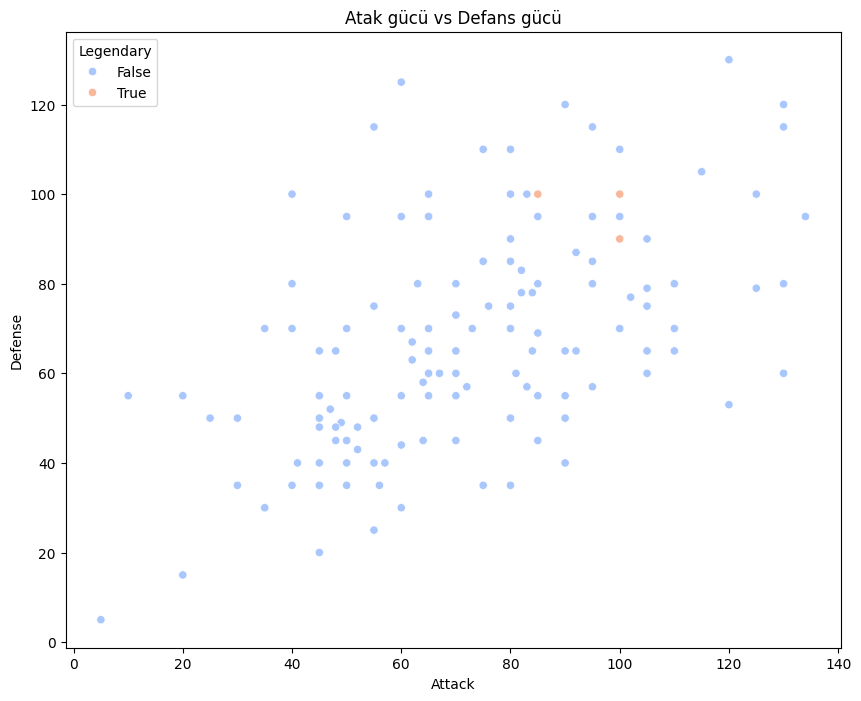

In [156]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="Attack",y="Defense",data=yeni2pokemon, hue='Legendary', palette='coolwarm')
plt.title("Atak gücü vs Defans gücü")
plt.xlabel("Attack")
plt.ylabel("Defense")
plt.show()

In [ ]:
#Özel atak ve özel defans gücü grafiğindeki efsanelik ilişkisi

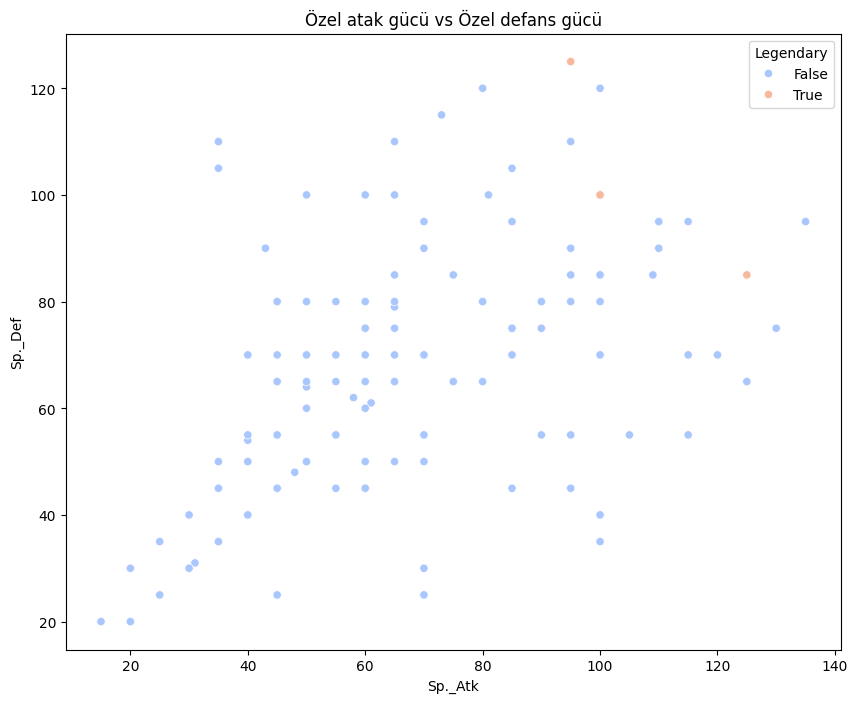

In [157]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="Sp._Atk",y="Sp._Def",data=yeni2pokemon, hue='Legendary', palette='coolwarm')
plt.title("Özel atak gücü vs Özel defans gücü")
plt.xlabel("Sp._Atk")
plt.ylabel("Sp._Def")
plt.show()

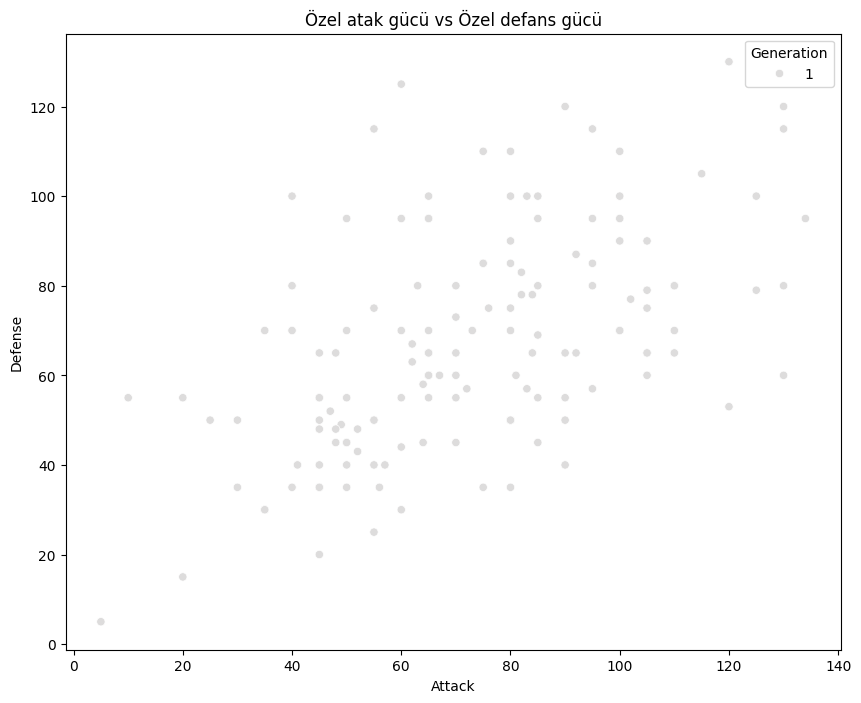

In [159]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="Attack",y="Defense",data=yeni2pokemon, hue='Generation', palette='coolwarm')
plt.title("Özel atak gücü vs Özel defans gücü")
plt.xlabel("Attack")
plt.ylabel("Defense")
plt.show()

In [ ]:
# Veri içinde hangi özellik kaç tane olduğuna bakalım

<ipython-input-161-8049aea0a042>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Type_1", data= yeni2pokemon, palette="viridis", order=yeni2pokemon["Type_1"].value_counts().index)


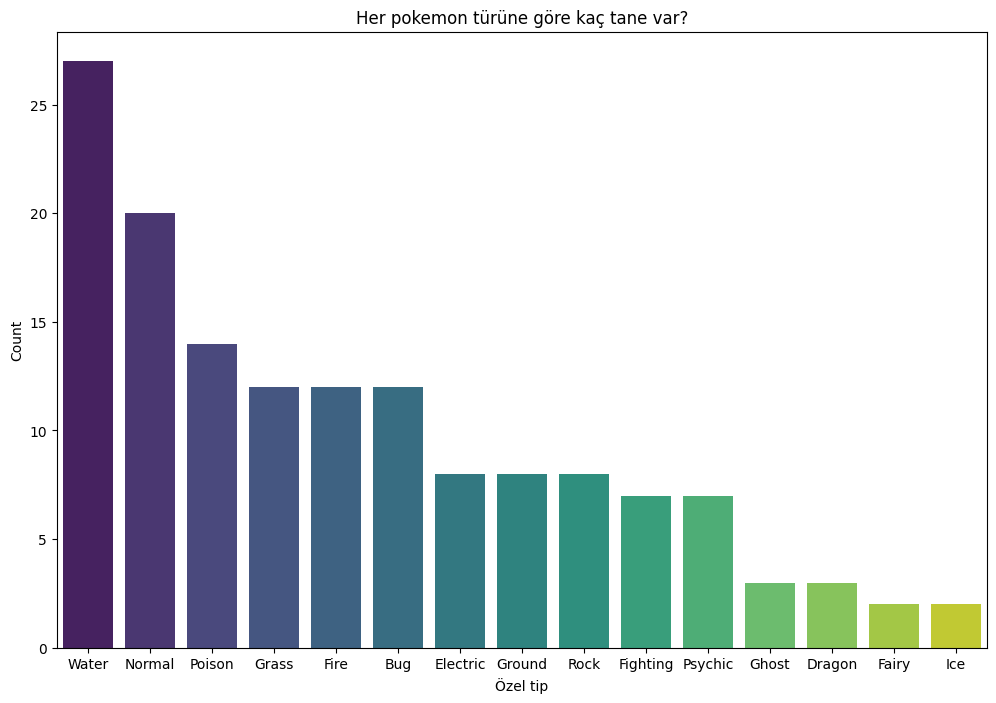

In [161]:
plt.figure(figsize=(12,8))
sns.countplot(x="Type_1", data= yeni2pokemon, palette="viridis", order=yeni2pokemon["Type_1"].value_counts().index)
plt.title("Her pokemon türüne göre kaç tane var?")
plt.xlabel("Özel tip")
plt.ylabel("Count")
plt.show()


In [ ]:
# Veri datasındaki pokemonların ne tür olduğuna bakalım.

<ipython-input-162-cf6e956df8a7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Type_2", data= yeni2pokemon, palette="viridis", order=yeni2pokemon["Type_2"].value_counts().index)


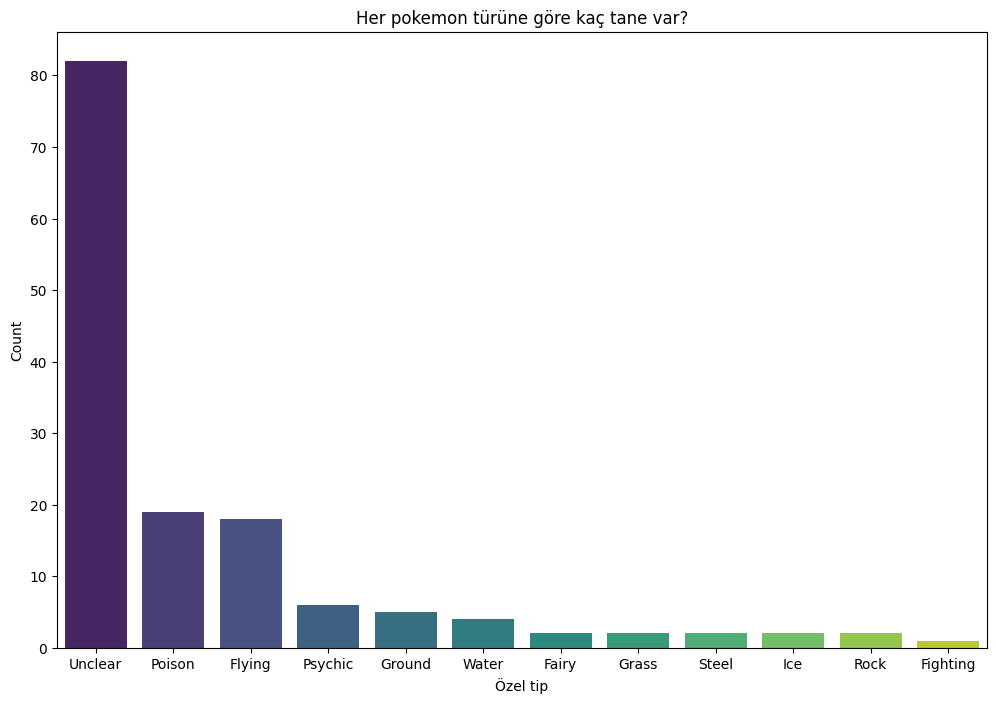

In [162]:
plt.figure(figsize=(12,8))
sns.countplot(x="Type_2", data= yeni2pokemon, palette="viridis", order=yeni2pokemon["Type_2"].value_counts().index)
plt.title("Her pokemon türüne göre kaç tane var?")
plt.xlabel("Özel tip")
plt.ylabel("Count")
plt.show()

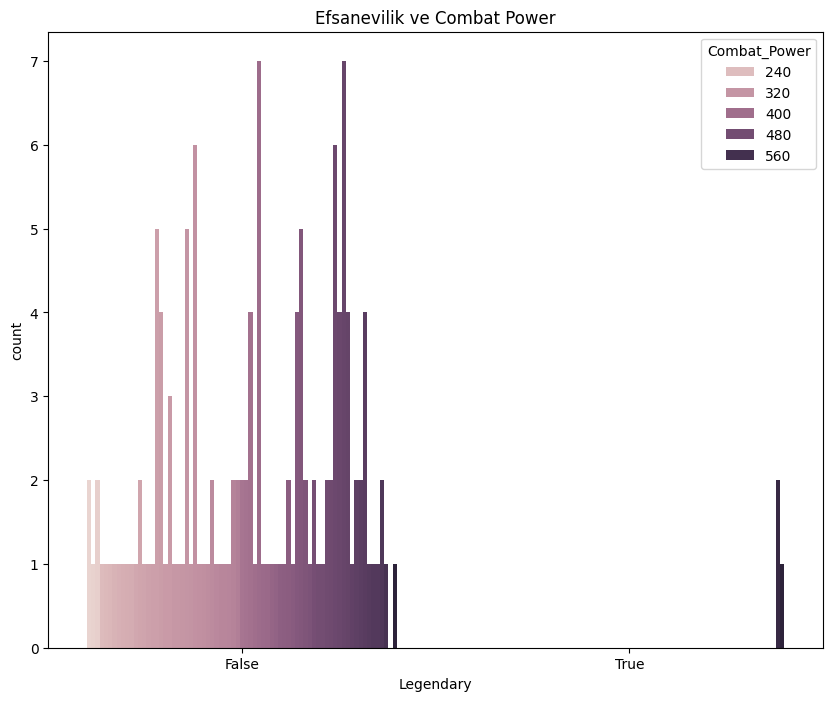

In [99]:
plt.figure(figsize=(10,8))
sns.countplot(x="Legendary",hue="Combat_Power",data=yeni2pokemon)
plt.title("Efsanevilik ve Combat Power")
plt.show()

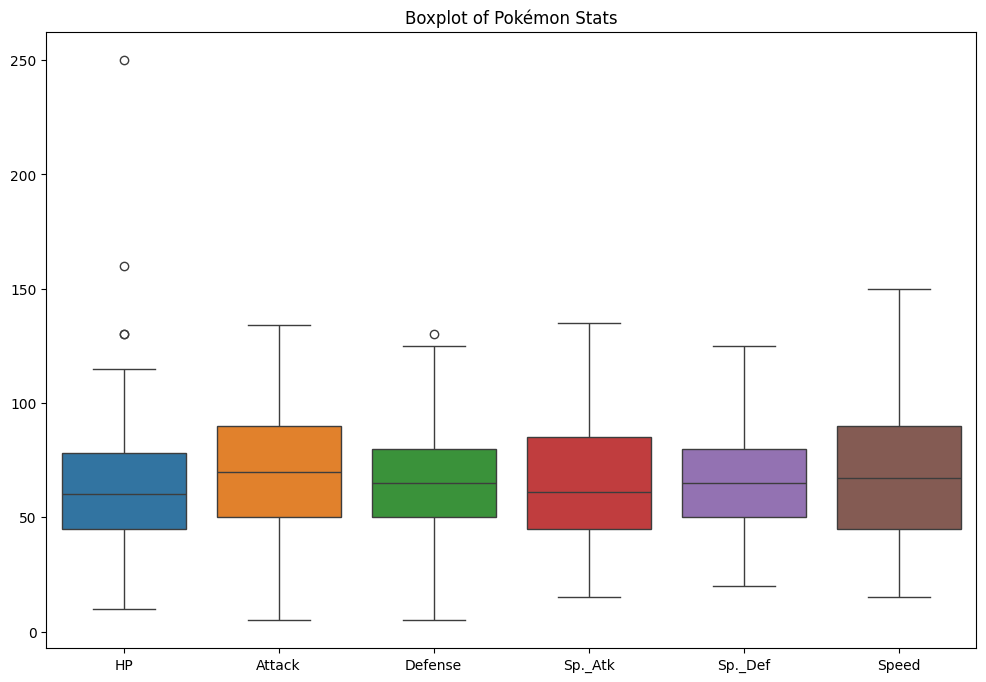

In [90]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=yeni2pokemon[['HP', 'Attack', 'Defense', 'Sp._Atk', 'Sp._Def', 'Speed']])
plt.title('Boxplot of Pokémon Stats')
plt.show()

In [102]:
#Korelasyon matrisine bakalım

In [ ]:
#Öncelikle sadece sayısal değerlere bakmamız gerekiyor, bunu belirledikten sonra ise korelasyon matriksini ayarlamamiz gerekir.

In [176]:
secilen_sutunlar = yeni2pokemon[["HP", "Attack", "Defense", "Sp._Atk", "Sp._Def", "Speed","Legendary","Combat_Power"]]
korelasyon_matriks = secilen_sutunlar.corr()
korelasyon_matriks

,HP,Attack,Defense,Sp._Atk,Sp._Def,Speed,Legendary,Combat_Power
HP,1.000000,0.296251,0.181837,0.205906,0.502672,-0.066844,0.157660,0.578644
Attack,0.296251,1.000000,0.546334,0.109698,0.361738,0.166811,0.125306,0.664246
Defense,0.181837,0.546334,1.000000,0.214543,0.192414,-0.092792,0.179283,0.536091
Sp._Atk,0.205906,0.109698,0.214543,1.000000,0.529677,0.388767,0.214397,0.663997
Sp._Def,0.502672,0.361738,0.192414,0.529677,1.000000,0.377601,0.223712,0.794439
Speed,-0.066844,0.166811,-0.092792,0.388767,0.377601,1.000000,0.126993,0.480278
Legendary,0.157660,0.125306,0.179283,0.214397,0.223712,0.126993,1.000000,0.275984
Combat_Power,0.578644,0.664246,0.536091,0.663997,0.794439,0.480278,0.275984,1.000000


In [ ]:
#Aşağıda ısı grafiği yer alıyor. Sütunlar arası ilişkileri görebliiriz.

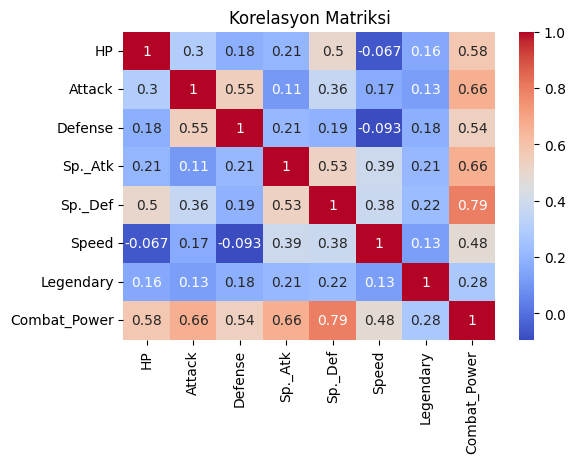

In [177]:
plt.figure(figsize=(6,4))
sns.heatmap(korelasyon_matriks, annot=True, cmap="coolwarm")
plt.title("Korelasyon Matriksi")
plt.show()

Karşımızda bir korelasyon matriks ısı haritası duruyor. Sütunlar arası ilişkileri haritaya göre yorumlayalım.

** Sütunların kendileri olan ilişkileri 1'dir ve yorumlamaya dahil edilmeyecektir.

HP SÜTUNU:

  -Attack: Pozitif korelasyon ancak oldukça düşük. Bu Pokemon'un HP'sinin saldırı gücüyle hafifçe artış gösterdiğini ancak ilişkinin çok güçlü olmadığını gösterir.

  -Defense: Bu da pozitif korelasyon ancak Attack ile benzer şekilde düşüktür. Yani Pokemon'un HP'sinin savunma gücüyle hafifçe artış gösterdiğini ancak ilişkinin çok güçlü olmadığını gösterir.

  -Sp._Atk (Özel Saldırı Gücü): HP ile Özel Saldırı Gücü arasında hafif bir pozitif korelasyon vardır. İlişki çok güçlü değil ancak bir artışın diğerine hafifçe bağlı olduğu gösterilebilir.

  -Sp._Def (Özel Defans Gücü): HP ile özel defans gücü arasında daha güçlü bir pozitif korelasyon olduğunu gösterir. Yüksek bir HP, genellikle yüksek bir Özel Defans gücü ile ilişkilendirilebilir.

  -Speed: Bu hafif bir negatif korelasyonu gösterir. HP arttıkça hızın azaldığına işaret edilebilir ancak bu ilişki güçlü değildir.

  -Legendary: Hp ile Efsanevi olup olmama durumu arasında hafif bir pozitif korelasyon vardır. Efsanevi Pokemonların genellikle daha yüksek bir HP'ye sahip olduğunu gösterebilir ancak bu ilişki güçlü değildir.

  -Combat_Power: Orta düzey pozitif korelasyonu gösterir. Bu bir pokemonun HP'sinin artmasıyla Combat_Power'ın genellikle artma eğilimi olduğunu gösterir.

ATTACK SÜTUNU:

  -Defense: Pozitif güçlü bir korelasyonu gösterir. Bir pokemon'un saldırı gücü yükseldiğinde, savunma gücü de genellikle yükselir.

  -Sp._Atk(Özel Saldırı Gücü): Düşük ve pozitif korelasyon gösterir. Saldırı gücü yükseldiğinde, Özel saldırı gücü de hafif bir şekilde yükselir.

  -Sp._Def(Özel Defans Gücü): Pozitif bir korelasyon, orta düzeyde güçlüdür. Pokemonun saldırı gücü yükseldiğinde, Özel Defans gücü de genellikle yükselir.

  -Speed: Pozitif bir korelasyon, ancak oldukça düşük. Saldırı gücü yükselirse hızı da hafifçe yükselir.

  -Legendary: Pozitif zayıf korelasyon gösterir. Efsanevi Pokemonların genellikle daha yüksek bir saldırı gücüne sahip olduğunu gösterebilir.

  -Combat_Power: Güçlü bir korelasyon gösterir. Bir pokemonun daha yüksek bir Combat_Power'a sahip olması daha yüksek bir saldırı gücü ile ilişkilidir.

DEFENSE SÜTUNU:

  -Sp._Atk(Özel Saldırı Gücü): Savunma gücü ile Özel Saldırı gücü arasında hafif bir pozitif korelasyon vardır. Savunma gücü arttıkça, Özel Saldırı Gücü de hafifçe artacaktır.

  -Sp._Def(Özel Savunma Gücü): Hafif pozitif korelasyon. Savunma gücü artan bir pokemonun özel defans gücü de hafifçe artar.

  -Speed: Çok düşük ve negatif korelasyon vardır. Hemen hemen yok denecek kadar azdır.

  -Legendary: Pozitif ve hafif bir korelasyondur. Efsanevi Pokemonların genellikle daha yüksek bir savunma gücüne sahip olduğnu gösterebilir ancak ilişki çok güçlü değildir.

  -Combat_Power: Orta düzeyde pozitif bir korelasyon gösterir. Savunma gücünün artmasıyla Combat Power'ın genellikle artma eğiliminde olduğunu gösteriyor.

SP._ATK (ÖZEL SALDIRI GÜCÜ) SÜTUNU:
  
  -Sp._Def(Özel Defans Gücü): Özel Saldırı gücü ve Özel Defans Gücü arasında pozitif güçlü bir korelasyon olduğunu gösterir. Yani bir Pokemon'un Özel Saldırı Gücü arttıkça, Özel Defans Gücü de genellikle artar.

  -Speed: Pozitif orta güçte bir korelasyondur. Özel Saldırı Gücü arttıkça, hızı da genellikle artar.

  -Legendary: Pozitif düşük güçte bir korelasyonu gösterir. Efsanevi Pokemonların genellikle daha yüksek bir Özel Saldırı Gücüne sahip olduğunu gösterebilir ancak ilişki çok güçlü değildir.

  Combat_Power: Güçlü pozitif bir korelasyonu gösterir. Özel saldırı gücünün artması Combat Power'ın artma eğiliminde olduğunu gösterir.

SP._DEF(ÖZEL DEFANS GÜCÜ) SÜTUNU:

  -Speed: Pozitif,orta düzeyde güçlü bir korelasyonu gösterir. Özel Defans gücü arttıkça genellikle hızı da artar.

  -Legendary: Düşük pozitif bir korelasyonu gösterir. Efsanevi pokemonların genellikle daha yüksek bir Özel Defans Gücüne sahip olduğunu gösterebilir, ancak ilişki güçlü değildir.

  -Combat_Power: Güçlü pozitif bir korelasyon olduğunu gösterir. Bu Pokemonun özel savunma gücünün artmasıyla Combat Power'ın genellikle artma eğiliminde olduğunu gösterir.

SPEED SÜTUNU:

  -Legendary: Pozitif düşük bir korelasyonu gösterir. Efsanevi pokemonların genellikle daha yüksek bir hıza olduğunu gösterebilir, ancak ilişki çok güçlü değildir.

  -Combat_Power: Orta düzeyde bir korelasyon gösterir, pozitiftir. Pokemonun hızının artmasıyla Combat Power'ın genellikle arttığını gözlemleyebiliriz.

LEGENDARY SÜTUNU:

  -Combat-Power: Zayıf pozitif bir korelasyon gözlemlenir. Bu efsanevi

In [ ]:
#Bu korelasyon ısı haritasına göre önem derecelerini sıralayalım:

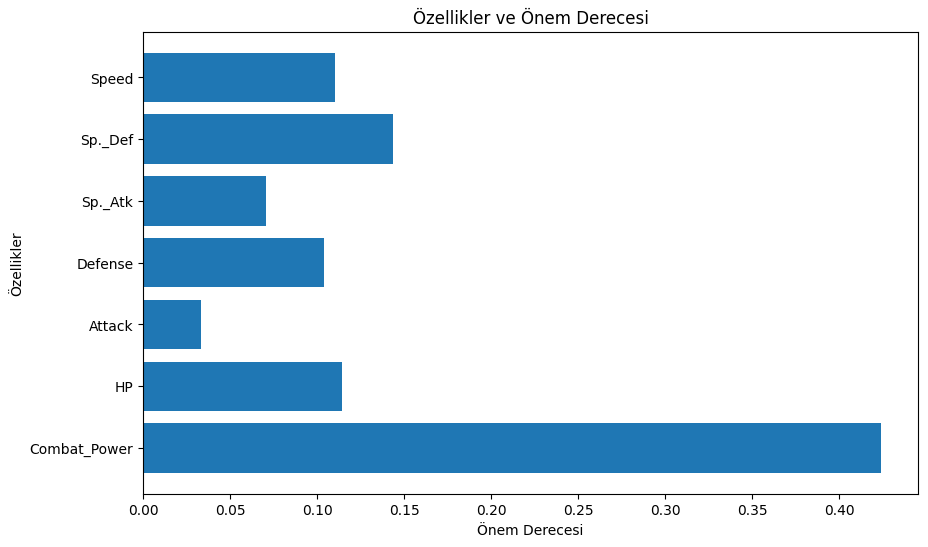

In [175]:
from sklearn.ensemble import RandomForestClassifier
X=yeni2pokemon.drop(columns=["Name","Type_1","Type_2","Legendary","Generation"],axis=1)
y=yeni2pokemon["Legendary"]

rf=RandomForestClassifier()
rf.fit(X,y)

feature_importances = rf.feature_importances_

plt.figure(figsize=(10,6))
plt.barh(X.columns,feature_importances)
plt.xlabel("Önem Derecesi")
plt.ylabel("Özellikler")
plt.title("Özellikler ve Önem Derecesi")
plt.show()

Görüldüğü üzere Özellikler ve Önem Dereceleri yukarıdaki grafikteki gibidir.


Speed, Sp._Def, Sp._Atk, Defense, Attack ve Hp özelliklerin önem dereceleri oldukça düşüktür.

Combat_Power özelliğinin önem derecesi oldukça yüksektir. Bu modelimizde Combat_Power özelliğinin tahminler üzerinde önemli bir etkisi olduğunu gösterir. Bu özellik, muhtemelemn modelimizin en büyük belirleyici faktörlerinden biridir.

In [178]:
#Verimizi analiz ettiysek şimdi yeni sütunlar oluşturalım. Bunlardan en mantıklı olacakları;
#1. Yetenek Oranları
yeni2pokemon["Yetenek Oranları"] = yeni2pokemon["Attack"]/yeni2pokemon["Defense"]

In [179]:
yeni2pokemon

,Name,Type_1,Type_2,Combat_Power,HP,Attack,Defense,Sp._Atk,Sp._Def,Speed,Generation,Legendary,Yetenek Oranları
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,1.000000
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,0.984127
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0.987952
3,Charmander,Fire,Unclear,309,39,52,43,60,50,65,1,False,1.209302
4,Charmeleon,Fire,Unclear,405,58,64,58,80,65,80,1,False,1.103448
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,1.111111
146,Dratini,Dragon,Unclear,300,41,64,45,50,50,50,1,False,1.422222
147,Dragonair,Dragon,Unclear,420,61,84,65,70,70,70,1,False,1.292308
148,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,1,False,1.410526


In [180]:
yeni2pokemon.columns = yeni2pokemon.columns.str.replace(' ', '_')

In [181]:
yeni2pokemon.columns

Index(['Name', 'Type_1', 'Type_2', 'Combat_Power', 'HP', 'Attack', 'Defense',
       'Sp._Atk', 'Sp._Def', 'Speed', 'Generation', 'Legendary',
       'Yetenek_Oranları'],
      dtype='object')

In [ ]:
#Yetenek Oranlarını görselleştirelim.

<function matplotlib.pyplot.show(close=None, block=None)>

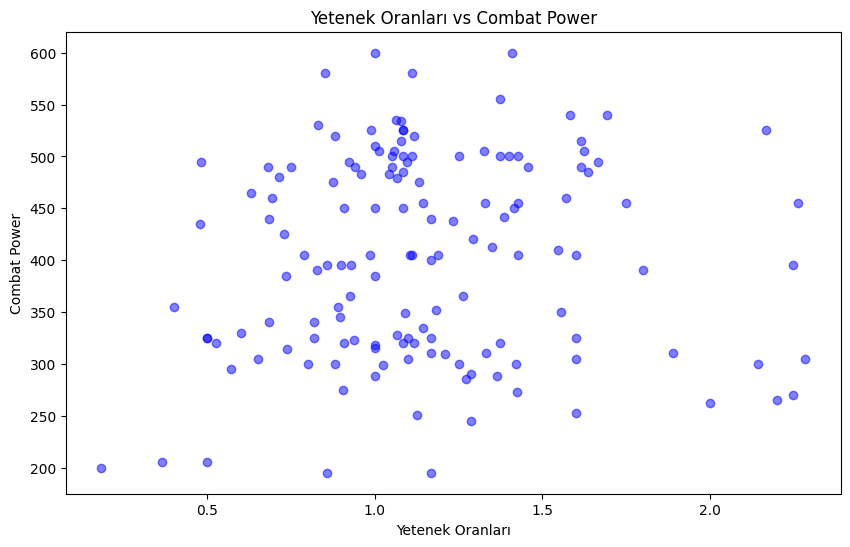

In [187]:
plt.figure(figsize=(10,6))
plt.scatter(yeni2pokemon["Yetenek_Oranları"], yeni2pokemon["Combat_Power"], color= "blue",alpha=0.5)
plt.title("Yetenek Oranları vs Combat Power")
plt.xlabel("Yetenek Oranları")
plt.ylabel("Combat Power")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

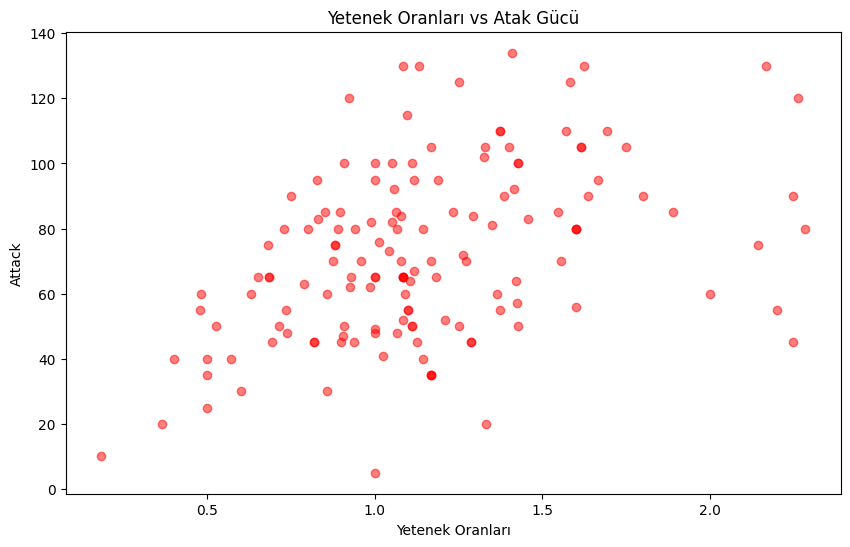

In [190]:
plt.figure(figsize=(10,6))
plt.scatter(yeni2pokemon["Yetenek_Oranları"], yeni2pokemon["Attack"], color= "red",alpha=0.5)
plt.title("Yetenek Oranları vs Atak Gücü")
plt.xlabel("Yetenek Oranları")
plt.ylabel("Attack")
plt.show

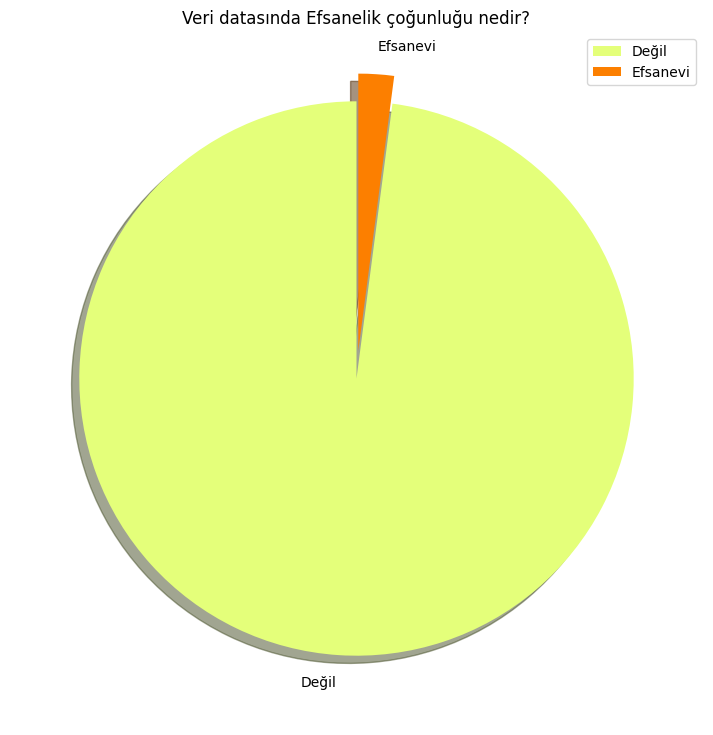

In [193]:
labels = ["Değil","Efsanevi"]
size = yeni2pokemon["Legendary"].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 5, 4))
explode = [0,0.1]
plt.rcParams["figure.figsize"]=(9,9)
plt.pie(size,labels=labels,colors=colors,explode=explode,shadow=True,startangle=90)
plt.title("Veri datasında Efsanelik çoğunluğu nedir?")
plt.legend()
plt.show()

Efsanevilik durumu veri datasında çok küçük bir kısmı kapsıyor. Yani efsanevi olmayanlar çoğunlukta diyebiliriz.

In [194]:
unique_types = yeni2pokemon["Type_1"].unique()
unique_types

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon'], dtype=object)

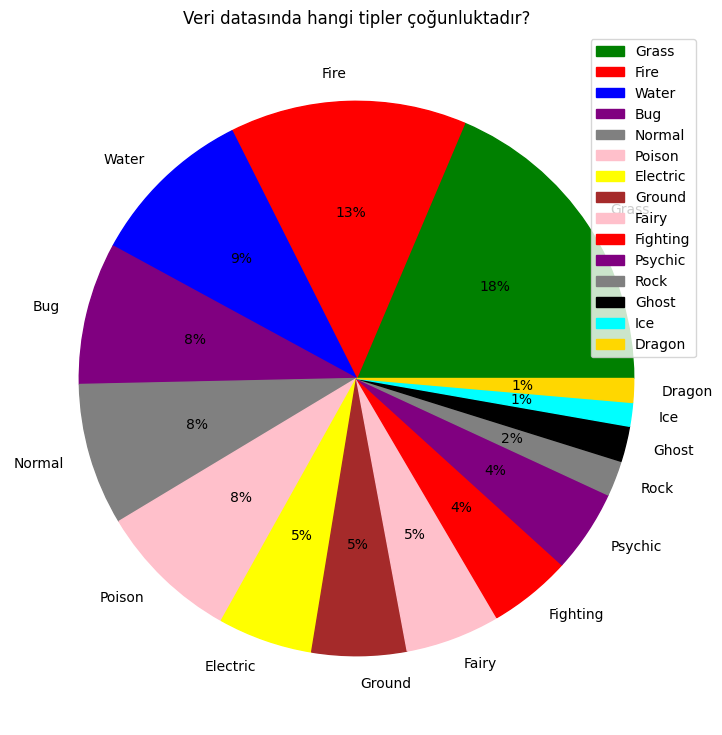

In [201]:
labels = ["Grass","Fire","Water","Bug","Normal","Poison","Electric","Ground","Fairy","Fighting","Psychic","Rock","Ghost","Ice","Dragon"]
size = yeni2pokemon["Type_1"].value_counts()
type_colors = {
    "Grass": "green",
    "Fire": "red",
    "Water": "blue",
    "Bug": "purple",
    "Normal": "gray",
    "Poison": "pink",
    "Electric": "yellow",
    "Ground": "brown",
    "Fairy": "pink",
    "Fighting": "red",
    "Psychic": "purple",
    "Rock": "gray",
    "Ghost": "black",
    "Ice": "cyan",
    "Dragon": "gold",
}

# Get the Pie object.
wedges, texts, autotexts = plt.pie(size, labels=labels, autopct="%d%%")

# Loop through each wedge and set its color based on the corresponding Type_1 value.
for i, wedge in enumerate(wedges):
    wedge.set_color(type_colors[labels[i]])

plt.rcParams["figure.figsize"]=(9,9)
plt.title("Veri datasında hangi tipler çoğunluktadır?")
plt.legend()
plt.show()

In [ ]:
#Görüldüğü üzere Grass ve Fire tipleri daha fazladır.

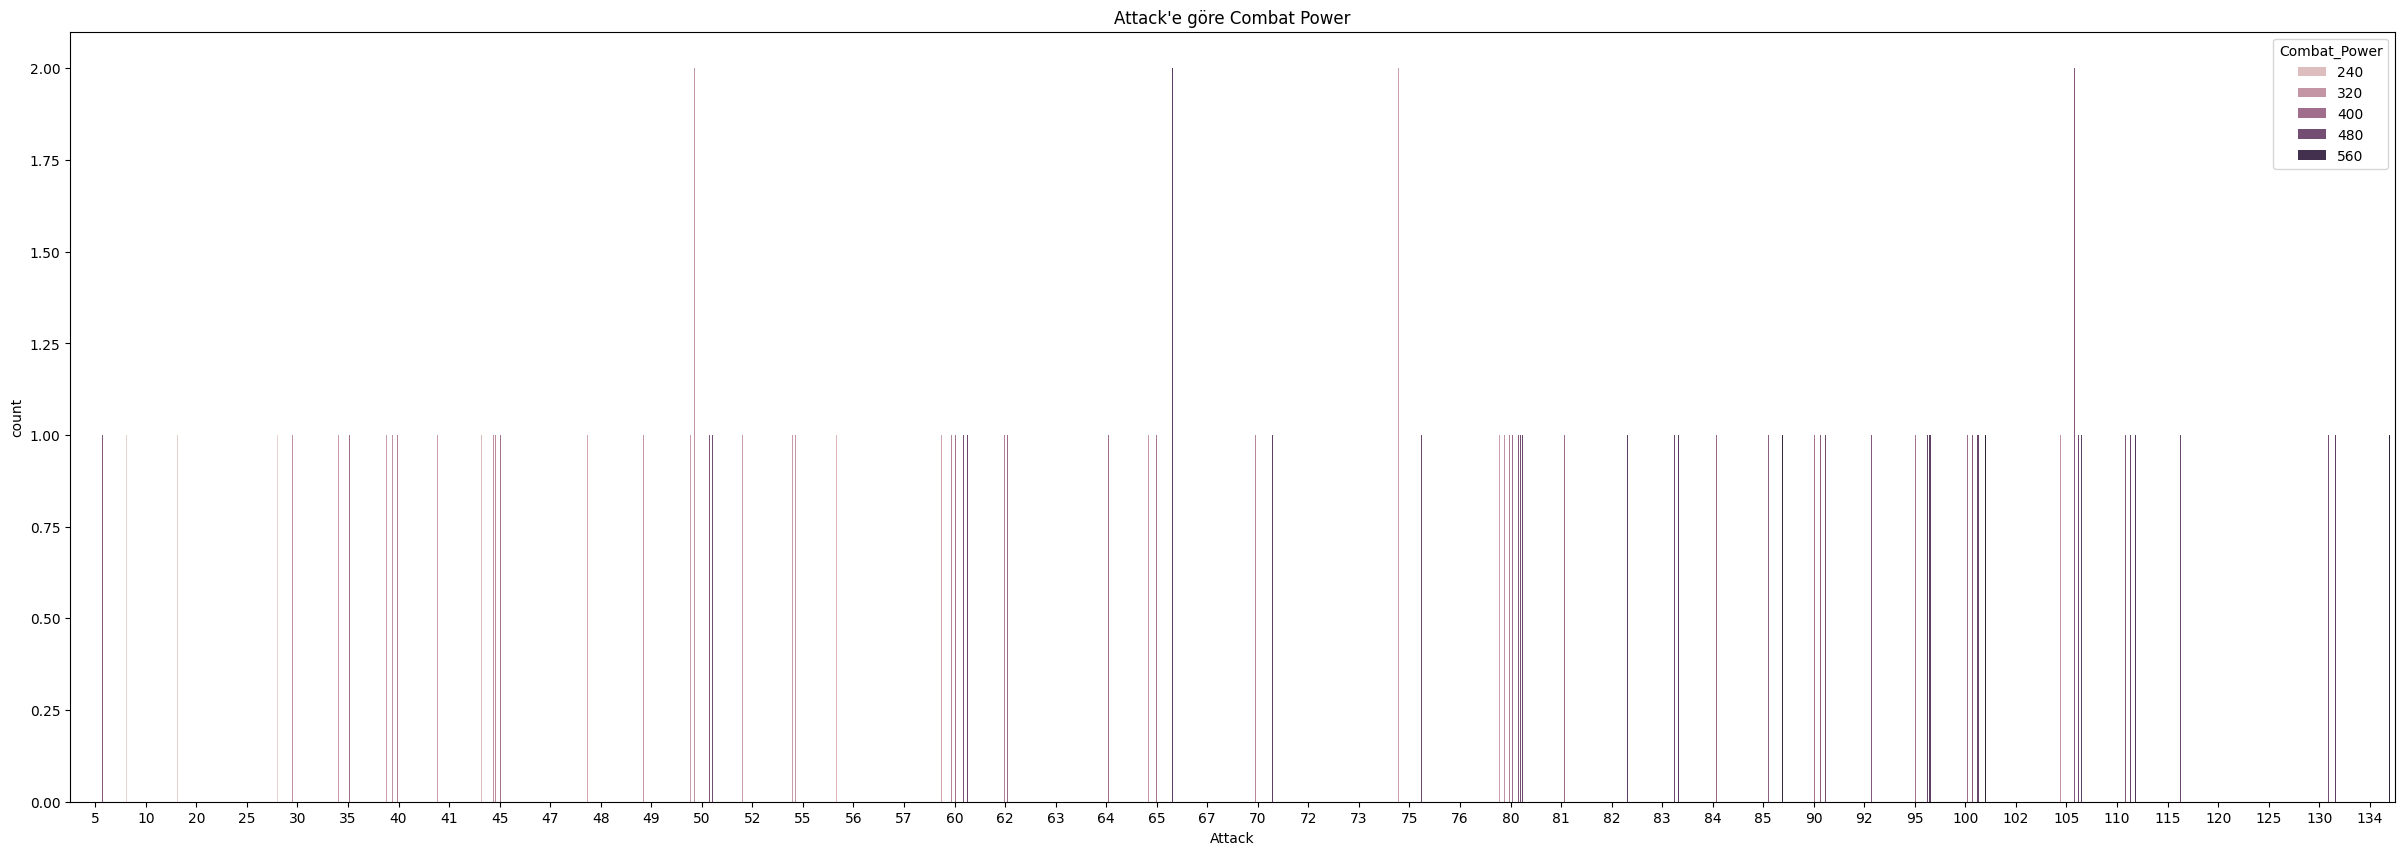

In [205]:
plt.figure(figsize=(30,10))
sns.countplot(x="Attack",hue="Combat_Power",data=yeni2pokemon)
plt.title("Attack'e göre Combat Power")
plt.show()

Bu şekilde Pokemon datasının veri analizini yapabildiğim kadarıyla yaptığmı düşünüyorum. Hiç bilmeden sadece araştıra araştıra yaparak bu yere kadar gelebildim. Umarım değerlendirirken bunu da göz önünde bulundurursunuz. Şimdiden projemi incelediğiniz için teşekkür ederim.